<a href="https://colab.research.google.com/github/hernansalinas/Curso_aprendizaje_estadistico/blob/main/Assesment/Laboratorio_redes_neuronales_convolucionales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Laboratorio redes neuronales convolucionales

Objetivo: Implementar un red neuronal LeNet5 empleando keras e implementar una red neuronal  VGG.  




1. Importar las librerias:
```python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from tensorflow import keras
```

2. Cargar los datos de entrenamiento y test
```python
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()
```


3. Normalizar los datos.

4. Realizar una visualización de 20 imagenes aproximadamente, puede emplear el comando imshow con cmap= binary

```python
  ax.imshow(X_train[i],cmap='binary')
```


5. Implementar en keras, la red Letnet5, la arquitectura de la red es la siguiente:

![img](https://github.com/hernansalinas/Curso_aprendizaje_estadistico/blob/main/Sesiones/convolution_img/LeNet5.png?raw=true)


Par la implementación, se recomienda construir un modelo secuencial.


```python
keras.backend.clear_session()
models=keras.models.Sequential([...])

```

algunos parámetros que pueden ser pasados dentro de los tres puntos anteriores son:


```python
keras.layers.MaxPool2D,
keras.layers.Conv2D,
keras.layers.Flatten,
keras.layers.Dense
```

Revisa la documentación para pasar los valores adecuados.


6. Revisa el modelo que acabaste de construir.
```python
model.summary()
```


7. Vamos a utlizar un optimizador de Adams,  El optimizador de Adam (Adaptive Moment Estimation) combina las ventajas de los algoritmos RMSProp y Momentum para mejorar el proceso de aprendizaje de un modelo. Al igual que Momentum, Adam utiliza una estimación del momento y de la magnitud de los gradientes anteriores para actualizar los parámetros del modelo en cada iteración. Sin embargo, en lugar de utilizar una tasa de aprendizaje constante para todos los parámetros, Adam adapta la tasa de aprendizaje de cada parámetro individualmente en función de su estimación del momento y de la magnitud del gradiente. Esto permite que el modelo se ajuste de manera más eficiente y efectiva a los datos de entrenamiento, lo que puede llevar a una mayor precisión de la predicción en comparación con otros métodos de optimización.



emplea el siguiente compilador del modelo
```python
 model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
 ```


 8. Realiza el fit del modelo, emplea GPU, para ello cambia la configuración de collaboratory para que tu modelo se ejecute un poco mas rápido.


 ```python
 history = model.fit(X_train,y_train,epochs=10,validation_split=0.3)
```


- Loss: es la medida del error que comete el modelo al predecir las etiquetas de los datos de entrenamiento. Es una función que se quiere minimizar durante el entrenamiento. Un valor bajo de loss indica que el modelo se ajusta bien a los datos de entrenamiento.
- Accuracy: es la medida del porcentaje de predicciones correctas que hace el modelo sobre los datos de entrenamiento. Es una métrica que se quiere maximizar durante el entrenamiento. Un valor alto de accuracy indica que el modelo clasifica bien los datos de entrenamiento.
- Val_loss: es la medida del error que comete el modelo al predecir las etiquetas de los datos de validación. Los datos de validación son un subconjunto de los datos de entrenamiento que se reservan para evaluar el rendimiento del modelo durante el entrenamiento. Un valor bajo de val_loss indica que el modelo se generaliza bien a los datos de validación.
- Val_accuracy: es la medida del porcentaje de predicciones correctas que hace el modelo sobre los datos de validación. Un valor alto de val_accuracy indica que el modelo clasifica bien los datos de validación.

9. Realiza la predicción:
```python
q=model.predict(X_test)
```

10. Muestra los valores de q y determina que numero se esta prediciendo.


11. Puede graficar la convergencia del modelo con los siguiente código
```python
import matplotlib.pyplot as plt
# Graficar la curva de loss
plt.plot (history.history ['loss'], label='loss')
plt.plot (history.history ['val_loss'], label='val_loss')
plt.title ('Curva de loss')
plt.xlabel ('Época')
plt.ylabel ('Loss')
plt.legend ()
plt.show ()
# Graficar la curva de accuracy
plt.plot (history.history ['accuracy'], label='accuracy')
plt.plot (history.history ['val_accuracy'], label='val_accuracy')
plt.title ('Curva de accuracy')
plt.xlabel ('Época')
plt.ylabel ('Accuracy')
plt.legend ()
plt.show ()
```



12. Una forma alterna de implementar el modelo puede ser dada de la siguiente forma:



```python
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam

X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)
input_shape = (28,28,1)
model = Sequential()
model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
#model.add(Dropout(0.25))
model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
#model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))

```


13. Emplea la arquitectura anterior para el  
  el dataset cifar100,  empleando BatchNormalization y dropout.


- BatchNormalization es una técnica que se usa para acelerar y estabilizar el entrenamiento de las redes neuronales artificiales, mediante la normalización de las entradas de cada capa, re-centrando y re-escalando los datos.

  BatchNormalization se aplica justo antes de la función de activación de cada capa, y consiste en centrar y normalizar cada mini-lote con una media y una desviación estándar calculadas con los datos del mini-lote, y luego re-escalar y desplazar los datos de nuevo con parámetros aprendidos por la red durante el entrenamiento. Estos parámetros permiten que la red se adapte a la distribución óptima de las activaciones para cada capa. Además, al introducir cierto ruido en los datos, BatchNormalization actúa como una regularización y ayuda a reducir el sobreajuste.


- El dropout es una técnica de regularización para reducir el sobreajuste en redes neuronales artificiales. El sobreajuste ocurre cuando el modelo se ajusta demasiado a los datos de entrenamiento y pierde capacidad de generalizar a nuevos datos. El dropout consiste en eliminar aleatoriamente algunas neuronas de la red durante el entrenamiento, lo que hace que el modelo sea más robusto y menos dependiente de ciertas conexiones. El dropout se puede interpretar como una forma de promediar varios modelos más pequeños y diferentes, lo que mejora el rendimiento final.

  El dropout se aplica a cada capa de la red, especificando una probabilidad de mantener cada neurona activa. Por ejemplo, si se usa un dropout de 0.2, significa que el 20% de las neuronas se desactivarán en cada iteración del entrenamiento. El dropout solo se usa durante el entrenamiento, no durante la inferencia o la evaluación. El dropout se puede combinar con otras técnicas de regularización, como la normalización de pesos o la normalización por lotes.




```python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from tensorflow import keras


(train_image, train_label) , (test_image, test_label) = keras.datasets.cifar100.load_data()


plt.imshow(train_image[30])
plt.axis('off')
```

intenta agregar, lineas como las siguientes en los lugares mas estrategicos:


```python
keras.layers.Dropout(0.2),
keras.layers.BatchNormalization()
```

14. Emplea el siguiente compilador:

El optimizador de NAdam (Nesterov-accelerated Adaptive Moment Estimation) es una variante de Adam que incorpora el método de Nesterov, que consiste en utilizar una predicción de la posición futura de los parámetros para calcular el gradiente, en lugar de la posición actual. Esto hace que el algoritmo sea más sensible a los cambios de dirección del gradiente y evite oscilaciones innecesarias. NAdam también modifica la forma de calcular el momento y la magnitud del gradiente, usando una media móvil exponencial sesgada hacia cero en lugar de una media móvil exponencial simple.


```python
model.compile(optimizer='nadam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
```

El número de épocas que se necesita para entrenar una red neuronal depende de varios factores, como el tamaño de los datos, la complejidad del modelo, la función de pérdida, el algoritmo de optimización, la tasa de aprendizaje, etc. No hay una regla fija para elegir el número de épocas, pero se puede usar el criterio de parada temprana, que consiste en monitorear el error de validación y detener el entrenamiento cuando este empiece a aumentar, lo que indica un sobreajuste del modelo.

15. Emplea early_stooping y realiza el fit



```python
early_stopping = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
```

El parámetro patience=5 indica el número de épocas sin mejora después de las cuales se detendrá el entrenamiento. El parámetro restore_best_weights=True indica que se restaurarán los pesos del modelo desde la época con el mejor valor de la métrica monitoreada. Esto puede ayudar a evitar el sobreajuste y mejorar el rendimiento del modelo



```python
history = model.fit(train_image, train_label, epochs=30, validation_split=0.2 , batch_size=64, callbacks=[early_stopping])
```

Ahora vamos a implementar una red VGG16, para ello puedes emplear la siguiente linea de código:


```python
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Indian elephant
!wget https://upload.wikimedia.org/wikipedia/commons/f/f9/Zoorashia_elephant.jpg -O indian_elephant.jpg
# African elephant
!wget https://upload.wikimedia.org/wikipedia/commons/b/bf/African_Elephant_%28Loxodonta_africana%29_male_%2817289351322%29.jpg -O african_elephant.jpg
#!wget https://github.com/ssanchezgoe/diplomado_udea/blob/master/image/african_elephant_bull.jpg?raw=true -O african_elephant.jpg

# Choose the elephant to be classified
img_path = 'african_elephant.jpg'

img = mpimg.imread(img_path)
implot = plt.imshow(img)

print("Tamaño de la imagen:",img.shape)
```


```python
from keras.preprocessing import image

model = keras.applications.vgg16.VGG16(weights='imagenet', include_top=True)
model.summary()

```


```python
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)# Añadir una dimensión extra para el lote
x = keras.applications.vgg16.preprocess_input(x)

features = model.predict(x)

print("Prediction", keras.applications.vgg16.decode_predictions(features, top=3)[0])
```

1. Importar las librerias:


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from tensorflow import keras

2. Cargar los datos de entrenamiento y test


In [3]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()



#Miremos algunos ejemplos de los datos

display('primeros valores de X_train', X_train[0])


11490434/11490434 [==============================] - 0s 0us/step


'primeros valores de X_train'

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
#Exploración de los datos

print("X_train shape:", X_train.shape, "y_train shape:", y_train.shape)

print('primeros valores de y_train', y_train[:5])


X_train shape: (60000, 28, 28) y_train shape: (60000,)
primeros valores de y_train [5 0 4 1 9]


3. Normalizar los datos.

In [ ]:
X_max = np.max(X_train) #para normalizar utilizamos el maximo valor presente en los datos
x_max =np.max(X_test)

X_train = X_train/X_max

X_test = X_test/x_max


4. Realizar una visualización de 20 imagenes aproximadamente, puede emplear el comando imshow con cmap= binary



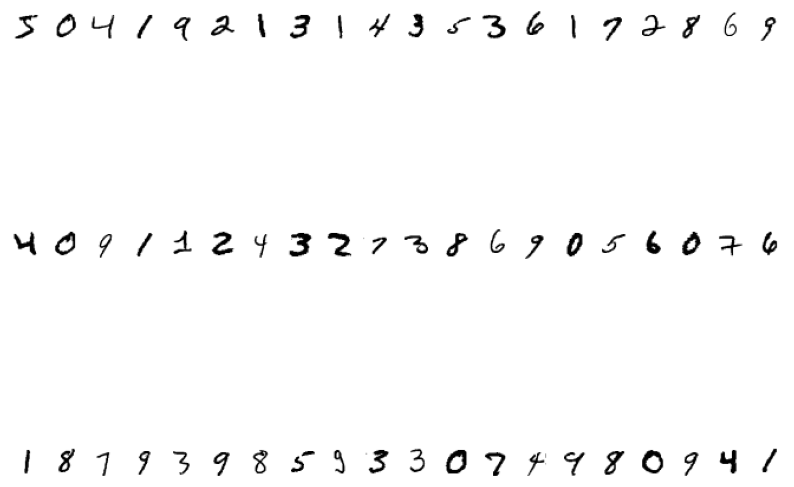

In [ ]:
fig, axs = plt.subplots(3, 20, figsize=(10, 8))
axs = axs.ravel()

for i in range(60):
    axs[i].imshow(X_train[i], cmap='binary')
    axs[i].set_xticks([])
    axs[i].set_yticks([])



5. Implementar en keras, la red Letnet5, la arquitectura de la red es la siguiente:

In [ ]:
keras.backend.clear_session()


from keras.src.layers.attention.multi_head_attention import activation

model = keras.Sequential()
model.add(keras.layers.Conv2D(6, (5,5), strides=(1,1),padding='Valid', input_shape=(28,28,1), activation='relu'))
model.add(keras.layers.AveragePooling2D(pool_size=(2,2),strides=2,padding='Valid'))
model.add(keras.layers.Conv2D(16, (5,5), strides=(1,1),padding='Valid', activation='relu'))
model.add(keras.layers.AveragePooling2D(pool_size=(2,2),strides=2,padding='Valid'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(120,activation='relu'))
model.add(keras.layers.Dense(84,activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))


6. Revisa el modelo que acabaste de construir.
```python
model.summary()
```


In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d (Average  (None, 12, 12, 6)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 average_pooling2d_1 (Avera  (None, 4, 4, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 120)               3

7. Vamos a utlizar un optimizador de Adams,  El optimizador de Adam (Adaptive Moment Estimation) combina las ventajas de los algoritmos RMSProp y Momentum para mejorar el proceso de aprendizaje de un modelo. Al igual que Momentum, Adam utiliza una estimación del momento y de la magnitud de los gradientes anteriores para actualizar los parámetros del modelo en cada iteración. Sin embargo, en lugar de utilizar una tasa de aprendizaje constante para todos los parámetros, Adam adapta la tasa de aprendizaje de cada parámetro individualmente en función de su estimación del momento y de la magnitud del gradiente. Esto permite que el modelo se ajuste de manera más eficiente y efectiva a los datos de entrenamiento, lo que puede llevar a una mayor precisión de la predicción en comparación con otros métodos de optimización.

emplea el siguiente compilador del modelo

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


8. Realiza el fit del modelo, emplea GPU, para ello cambia la configuración de collaboratory para que tu modelo se ejecute un poco mas rápido.

In [ ]:
history = model.fit(X_train,y_train,epochs=10,validation_split=0.3)


Epoch 1/10
1313/1313 [==============================] - 18s 6ms/step - loss: 0.2836 - accuracy: 0.9146 - val_loss: 0.1349 - val_accuracy: 0.9591
Epoch 2/10
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0958 - accuracy: 0.9718 - val_loss: 0.0821 - val_accuracy: 0.9741
Epoch 3/10
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0677 - accuracy: 0.9784 - val_loss: 0.0755 - val_accuracy: 0.9771
Epoch 4/10
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0530 - accuracy: 0.9825 - val_loss: 0.0767 - val_accuracy: 0.9769
Epoch 5/10
1313/1313 [==============================] - 9s 7ms/step - loss: 0.0435 - accuracy: 0.9859 - val_loss: 0.0650 - val_accuracy: 0.9806
Epoch 6/10
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0366 - accuracy: 0.9885 - val_loss: 0.0589 - val_accuracy: 0.9821
Epoch 7/10
1313/1313 [==============================] - 7s 6ms/step - loss: 0.0294 - accuracy: 0.9901 - val_loss: 0.0566 - val_accuracy

9. Realiza la predicción:
```python
q=model.predict(X_test)
```

In [ ]:
q=model.predict(X_test)

#Se Imprime el primer elemento de la predicción
print('Predicción primer elemento one hot encoding: ',q[0])

#imprimir algunos valores del la prediccion y el valor real

print('Valor real:', y_test[:5])
print('Predicción:', np.argmax(q[:5], axis=1))

313/313 [==============================] - 1s 2ms/step
Predicción primer elemento one hot encoding:  [3.8369947e-13 1.4533214e-08 2.8230601e-10 4.9046039e-10 1.6021890e-11
 6.3976571e-12 1.5545951e-12 1.0000000e+00 1.1052284e-11 3.7613550e-08]
Valor real: [7 2 1 0 4]
Predicción: [7 2 1 0 4]


10. Muestra los valores de q y determina que numero se esta prediciendo.

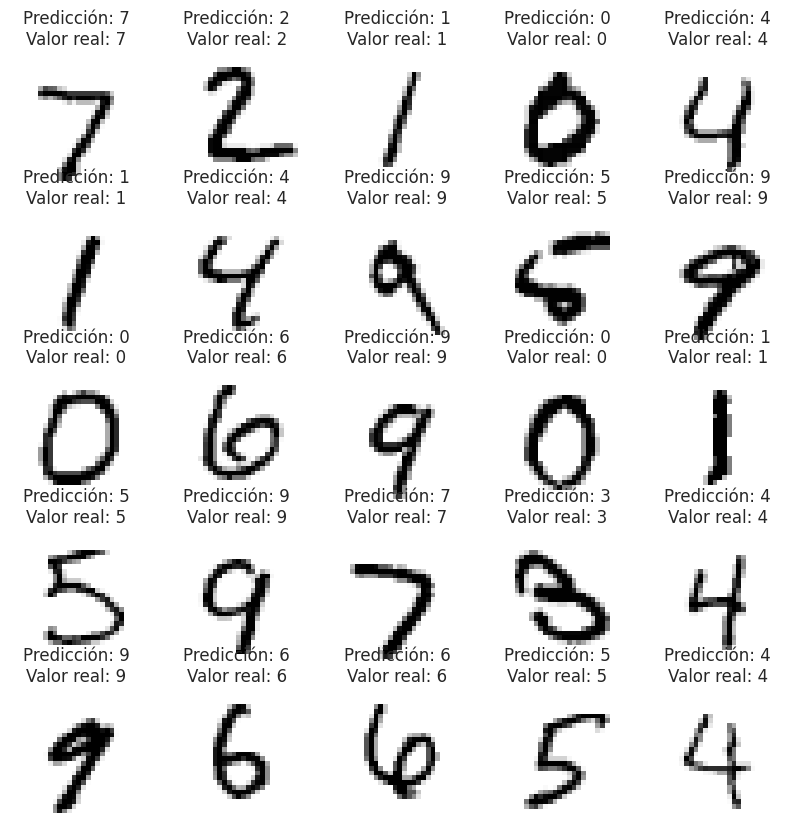

In [ ]:
#se grafican algunas predicciones con su valor real

fig, axs = plt.subplots(nrows=5, ncols=5, figsize=(10, 10))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(X_test[idx].reshape(28, 28), cmap="binary")
    ax.axis("off")
    ax.set_title(f"Predicción: {np.argmax(q[idx])}\nValor real: {y_test[idx]}")

11. Puede graficar la convergencia del modelo con los siguiente código

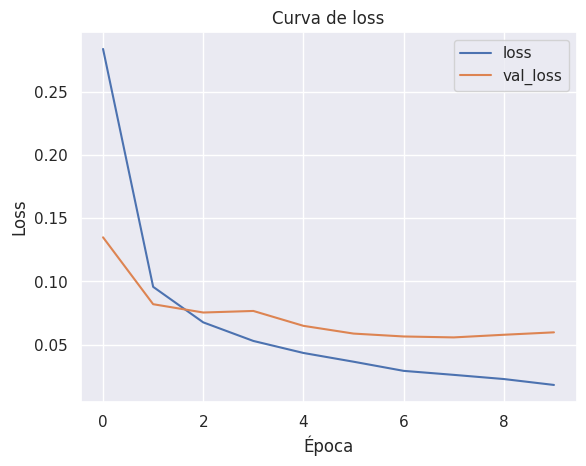

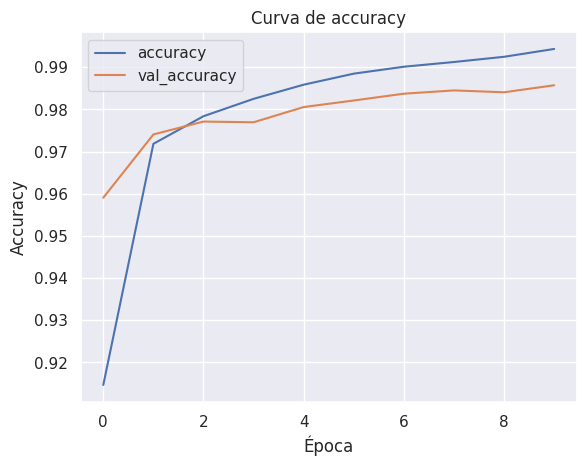

In [ ]:
import matplotlib.pyplot as plt
# Graficar la curva de loss
plt.plot (history.history ['loss'], label='loss')
plt.plot (history.history ['val_loss'], label='val_loss')
plt.title ('Curva de loss')
plt.xlabel ('Época')
plt.ylabel ('Loss')
plt.legend ()
plt.show ()
# Graficar la curva de accuracy
plt.plot (history.history ['accuracy'], label='accuracy')
plt.plot (history.history ['val_accuracy'], label='val_accuracy')
plt.title ('Curva de accuracy')
plt.xlabel ('Época')
plt.ylabel ('Accuracy')
plt.legend ()
plt.show ()

12. Una forma alterna de implementar el modelo puede ser dada de la siguiente forma:


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam

X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)
input_shape = (28,28,1)
model = Sequential()
model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.25))
model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 6)         0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 12, 12, 6)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 16)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 4, 4, 16)          0

13. Emplea la arquitectura anterior para el dataset cifar100,  empleando BatchNormalization y dropout.

In [5]:
#Importemos el dataset de CIFAR100

from tensorflow.keras.datasets import cifar100

(X_train, y_train), (X_test, y_test) = cifar100.load_data(label_mode='fine')

#Miremos algunos ejemplos de los datos

display('primeros valores de X_train', X_train[0])





'primeros valores de X_train'

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [195, 205, 193],
        [212, 224, 204],
        [182, 194, 167]],

       [[255, 255, 255],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [170, 176, 150],
        [161, 168, 130],
        [146, 154, 113]],

       [[255, 255, 255],
        [254, 254, 254],
        [255, 255, 255],
        ...,
        [189, 199, 169],
        [166, 178, 130],
        [121, 133,  87]],

       ...,

       [[148, 185,  79],
        [142, 182,  57],
        [140, 179,  60],
        ...,
        [ 30,  17,   1],
        [ 65,  62,  15],
        [ 76,  77,  20]],

       [[122, 157,  66],
        [120, 155,  58],
        [126, 160,  71],
        ...,
        [ 22,  16,   3],
        [ 97, 112,  56],
        [141, 161,  87]],

       [[ 87, 122,  41],
        [ 88, 122,  39],
        [101, 134,  56],
        ...,
        [ 34,  36,  10],
        [105, 133,  59],
        [138, 173,  79]]

In [9]:
#Analizemos las dimensiones de los datos

print("X_train shape:", X_train.shape, "y_train shape:", y_train.shape)

print("shape de un dato de X_train:", X_train[1].shape)

print('primeros valores de y_train', y_train[:5])

X_train shape: (50000, 32, 32, 3) y_train shape: (50000, 1)
shape de un dato de X_train: (32, 32, 3)
primeros valores de y_train [[19]
 [29]
 [ 0]
 [11]
 [ 1]]


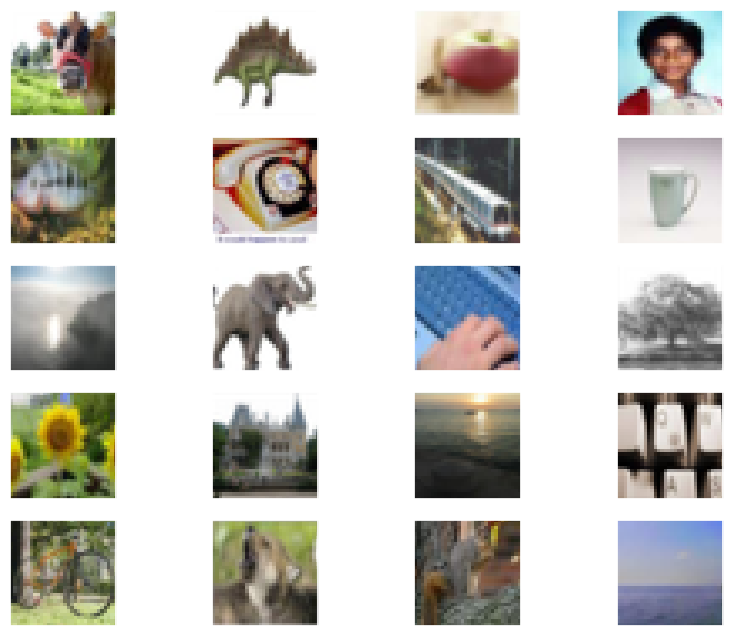

In [13]:
fig, axs = plt.subplots(5, 4, figsize=(10, 8))
axs = axs.ravel()

for i in range(20):
    axs[i].imshow(X_train[i], cmap='binary')
    axs[i].set_xticks([])
    axs[i].set_yticks([])

In [21]:
X_max = np.max(X_train) #para normalizar utilizamos el maximo valor presente en los datos
x_max =np.max(X_test)

X_train = X_train/X_max

X_test = X_test/x_max


In [22]:
from tensorflow.keras.layers import BatchNormalization

input_shape = X_train[1].shape

model = Sequential()

# Primera capa convolucional
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
# Capa de salida
model.add(Dense(100, activation='softmax'))


14. Emplea el siguiente compilador:

El optimizador de NAdam (Nesterov-accelerated Adaptive Moment Estimation) es una variante de Adam que incorpora el método de Nesterov, que consiste en utilizar una predicción de la posición futura de los parámetros para calcular el gradiente, en lugar de la posición actual. Esto hace que el algoritmo sea más sensible a los cambios de dirección del gradiente y evite oscilaciones innecesarias. NAdam también modifica la forma de calcular el momento y la magnitud del gradiente, usando una media móvil exponencial sesgada hacia cero en lugar de una media móvil exponencial simple.


In [23]:
model.compile(optimizer='nadam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

15. Emplea early_stooping y realiza el fit



```python
early_stopping = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
```

El parámetro patience=5 indica el número de épocas sin mejora después de las cuales se detendrá el entrenamiento. El parámetro restore_best_weights=True indica que se restaurarán los pesos del modelo desde la época con el mejor valor de la métrica monitoreada. Esto puede ayudar a evitar el sobreajuste y mejorar el rendimiento del modelo



```python
history = model.fit(train_image, train_label, epochs=30, validation_split=0.2 , batch_size=64, callbacks=[early_stopping])
```

In [24]:
early_stopping = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

In [25]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2 , batch_size=64, callbacks=[early_stopping])

Epoch 1/100
625/625 [==============================] - 11s 11ms/step - loss: 4.2536 - accuracy: 0.1018 - val_loss: 3.7552 - val_accuracy: 0.1402
Epoch 2/100
625/625 [==============================] - 6s 9ms/step - loss: 3.3701 - accuracy: 0.1980 - val_loss: 3.1283 - val_accuracy: 0.2224
Epoch 3/100
625/625 [==============================] - 7s 10ms/step - loss: 2.9950 - accuracy: 0.2621 - val_loss: 2.8080 - val_accuracy: 0.3057
Epoch 4/100
625/625 [==============================] - 6s 9ms/step - loss: 2.7991 - accuracy: 0.2979 - val_loss: 2.5996 - val_accuracy: 0.3438
Epoch 5/100
625/625 [==============================] - 6s 10ms/step - loss: 2.6514 - accuracy: 0.3294 - val_loss: 2.7703 - val_accuracy: 0.3126
Epoch 6/100
625/625 [==============================] - 6s 9ms/step - loss: 2.5499 - accuracy: 0.3479 - val_loss: 2.5405 - val_accuracy: 0.3484
Epoch 7/100
625/625 [==============================] - 6s 10ms/step - loss: 2.4559 - accuracy: 0.3640 - val_loss: 2.9995 - val_accuracy: 0

Ahora vamos a implementar una red VGG16, para ello puedes emplear la siguiente linea de código:


--2023-12-04 07:03:40--  https://upload.wikimedia.org/wikipedia/commons/f/f9/Zoorashia_elephant.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 198.35.26.112, 2620:0:863:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|198.35.26.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168370 (164K) [image/jpeg]
Saving to: ‘indian_elephant.jpg’

indian_elephant.jpg 100%[===================>] 164.42K  --.-KB/s    in 0.06s   

2023-12-04 07:03:40 (2.72 MB/s) - ‘indian_elephant.jpg’ saved [168370/168370]

--2023-12-04 07:03:40--  https://upload.wikimedia.org/wikipedia/commons/b/bf/African_Elephant_%28Loxodonta_africana%29_male_%2817289351322%29.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 198.35.26.112, 2620:0:863:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|198.35.26.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11612484 (11M) [image/jpeg]
Saving to: ‘african_elephan

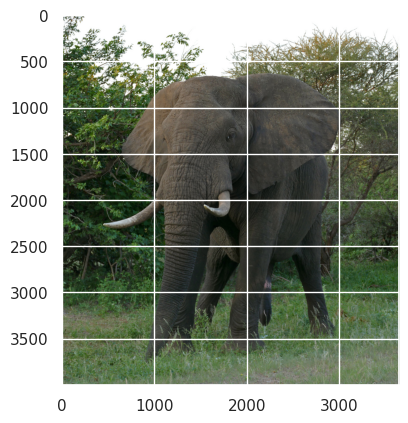

In [26]:
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Indian elephant
!wget https://upload.wikimedia.org/wikipedia/commons/f/f9/Zoorashia_elephant.jpg -O indian_elephant.jpg
# African elephant
!wget https://upload.wikimedia.org/wikipedia/commons/b/bf/African_Elephant_%28Loxodonta_africana%29_male_%2817289351322%29.jpg -O african_elephant.jpg
# !wget https://github.com/ssanchezgoe/diplomado_udea/blob/master/image/african_elephant_bull.jpg?raw=true -O african_elephant.jpg

# Choose the elephant to be classified
img_path = 'african_elephant.jpg'

img = mpimg.imread(img_path)
implot = plt.imshow(img)

print("Tamaño de la imagen:",img.shape)



```python
from keras.preprocessing import image

model = keras.applications.vgg16.VGG16(weights='imagenet', include_top=True)
model.summary()

```


```python
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)# Añadir una dimensión extra para el lote
x = keras.applications.vgg16.preprocess_input(x)

features = model.predict(x)

print("Prediction", keras.applications.vgg16.decode_predictions(features, top=3)[0])
```

In [27]:
from keras.preprocessing import image

model = keras.applications.vgg16.VGG16(weights='imagenet', include_top=True)
model.summary()

553467096/553467096 [==============================] - 9s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [28]:
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)# Añadir una dimensión extra para el lote
x = keras.applications.vgg16.preprocess_input(x)

features = model.predict(x)

print("Prediction", keras.applications.vgg16.decode_predictions(features, top=3)[0])

35363/35363 [==============================] - 0s 0us/step
Prediction [('n02504458', 'African_elephant', 0.901432), ('n01871265', 'tusker', 0.0896637), ('n02504013', 'Indian_elephant', 0.008881178)]
